### LANE DETECTION USING HOUGH LINES - 

##### Reference - https://www.youtube.com/watch?v=eLTLtUVuuy4

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture('test2.mp4')  
while cap.isOpened():
    ret, img = cap.read()

    cv2.imshow("Frame",img)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break
    if key == ord('p'):
        cv2.waitKey(-1) # wait until q key is pressed
cap.release()
cv2.destroyAllWindows()

In [ ]:
def make_coordinates(frame , parameters):
    slope , intercept = parameters
    y1 = frame.shape[0]  # the y coordinate of the first point as lines originate from bottom.
    y2 = int(y1*3/5)  # Lines upto 3/5th of whole image.
    x1 = int((y1-intercept)/slope)  # y=mx+c hence , x = (y-c)/slope
    x2 = int((y2-intercept)/slope)
    
    return np.array([x1,y1,x2,y2])

def averaged_lines_slope_intercept(frame ,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1 ,y1 ,x2,y2 =  line.reshape(4)
        parameters = np.polyfit((x1,x2) ,(y1,y2) ,1)  # slope and intercepts
#         print(parameters)
        slope = parameters[0]
        intercept = parameters[1]  # As openCV has y increasing down the image , lines on the left has negative slope and lines on the right has positive slope.
        
        if (slope<0):
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
#     print(left_fit)
#     print(right_fit)
    
    left_fit_avg = np.average(left_fit , axis =0)
    right_fit_avg = np.average(right_fit , axis=0)
    left_line = make_coordinates(frame , left_fit_avg)
    right_line = make_coordinates(frame , right_fit_avg)
#     print(left_fit_avg)
#     print(right_fit_avg)

    return left_line , right_line

def canny_convert(frame):
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray ,(5,5) ,0)  # sigmaX=0
    canny = cv2.Canny(blurred_img , 50 , 150)  # Documentation specifies ratio 1:3 for canny edge detection.
    return canny   
def region_of_interest(frame ,canny_img):
    height = frame.shape[0]  # dimensions are (704,1100,3)
    triangle = np.array([[(200 ,height) ,(1100 ,height) , (550,300)]])  # Its 2-D form , refer video for more explanation.
    mask = np.zeros_like(frame ,dtype='uint8')
    cv2.fillPoly(mask, triangle , 255)  # White in region of the roi.
    masked_img = cv2.bitwise_and(canny_img ,canny_img ,mask = mask)   # https://www.youtube.com/watch?v=eLTLtUVuuy4&ab_channel=ProgrammingKnowledge --beautiful explanation
    
    return masked_img

def hough_lines(frame):
    lines = cv2.HoughLinesP(frame , 2, (np.pi)/180 , 100 ,None , minLineLength = 40 , maxLineGap=50 )  # HoughlinesP executes faster and is an optimized version. Check the above video for a more indepth explanation. The acuumulator is the grid he talked about(the bins etc.). The threshold is the minimum number of interesections needeed to denote a line.
                                                                           # This is a placeholder array.
    return lines

def display_lines(frame , lines):  # We need to display it in a mask and then blend it in the frame.
    line_image = np.zeros_like(frame)
    if lines is not None:
        for line in lines:  # Now lines are in a 2-D array , and have coordinated of each point , so we need to reshape it into a 1-D array.
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image ,(x1,y1) ,(x2,y2) ,(255,0,0) ,10 ,cv2.LINE_AA)
    combo_img = cv2.addWeighted(frame , 0.9 ,line_image ,0.7 , 1)
    return combo_img
    
    

cap = cv2.VideoCapture('test2.mp4')      

while True:
    ret ,frame = cap.read()
    if ret is not None:
        lane_image = frame.copy()
        roi_lane_image = cv2.cvtColor(lane_image , cv2.COLOR_BGR2GRAY)
        canny = canny_convert(lane_image)
        masked_img = region_of_interest(roi_lane_image , canny) 
        lines = hough_lines(masked_img)
        averaged_lines = averaged_lines_slope_intercept(lane_image ,lines)
        combo_img = display_lines(lane_image , averaged_lines)
        
        cv2.imshow('Lane Detection' ,combo_img)
        
        
        if cv2.waitKey(1) == 27:
            break
            cap.release()
            cv2.destroyAllWindows()
            
    

## LEARNING MORE ABOUT MASKS AND CANNY EDGE DETECTION

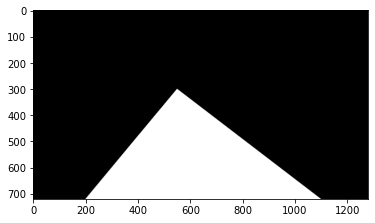

In [48]:
plt.imshow(mask ,cmap='gray')

In [9]:
def canny(frame):
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    blurred_img = cv2.GaussianBlur(gray ,(5,5) ,0)  # sigmaX=0
    canny = cv2.Canny(blurred_img , 50 , 150)  # Documentation specifies ratio 1:3 for canny edge detection.
    return canny

In [8]:
img = cv2.imread('lane.jpg')

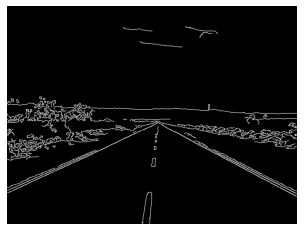

In [17]:
plt.axis('off')
plt.imshow(canny(img) ,cmap='gray')

In [21]:
def region_of_interest(frame ,canny_img):
    height = frame.shape[0]  # dimensions are (704,1100,3)
    triangle = np.array([[(200 ,height) ,(1100 ,height) , (550,300)]])  # Its 2-D form , refer video for more explanation.
    mask = np.zeros_like(frame ,dtype='uint8')
    mask = cv2.fillPoly(mask, triangle , 255)  # White in region of the roi.
    return mask

In [23]:
mask = region_of_interest(img ,canny)

In [24]:
mask.shape

(450, 600, 3)

In [25]:
img.shape

(450, 600, 3)

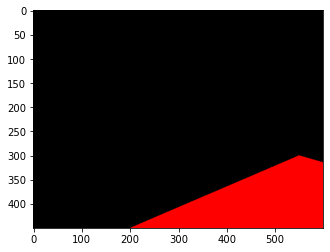

In [27]:
plt.imshow(mask)